# A short trip in pop music history for the past 50 years, through lens of billboard charts
## - Exploratory data analysis on billboard chart to answer 5 questions

### question1: which artist has dominated top 1 for longest weeks in the history? Is it Beatles??

In [1]:
import pandas as pd
top10 = pd.read_pickle('Billboard_data')
top10.head()

,date,title,artist,rank,weeks,change_in_rank,spotifyID
0,2017-03-18,Shape Of You,Ed Sheeran,1.0,8.0,0,0FE9t6xYkqWXU2ahLh6D8X
0,2017-03-18,Bad And Boujee,Migos Featuring Lil Uzi Vert,2.0,16.0,0,1FvU97lrWOG2NRxErh6OZz
0,2017-03-18,I Don't Wanna Live Forever (Fifty Shades Darker),Zayn / Taylor Swift,3.0,12.0,0,6yIdwnpDHufLWgQcveTPMk
0,2017-03-18,That's What I Like,Bruno Mars,4.0,7.0,0,0KKkJNfGyhkQ5aFogxQAPU
0,2017-03-18,Something Just Like This,The Chainsmokers & Coldplay,5.0,2.0,+51,


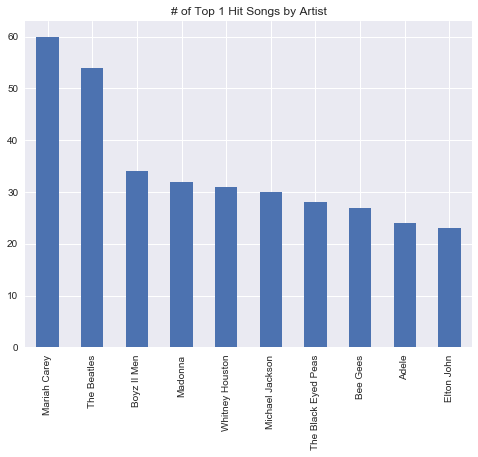

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,6)
top1 = top10[top10['rank']==1.0]
top1.artist.value_counts()[:10].plot(kind='bar',title='# of Top 1 Hit Songs by Artist')

Turns out Mariah Carey has more times ranked 1 on billboard history! Also this result is not considering many collaborated song Mariah Carey have with Boyz II Men and other artists.

Also some very recent singers like The Black Eyed Peas and Adele both have more than 20 times ranked top 1.

Now I wonder if their success comes from some very successful songs, or they are powerful enough to land as many songs as possible onto billboard?

In [3]:
unique_title_artist = top10.drop_duplicates(subset=['title','artist'],keep='first')

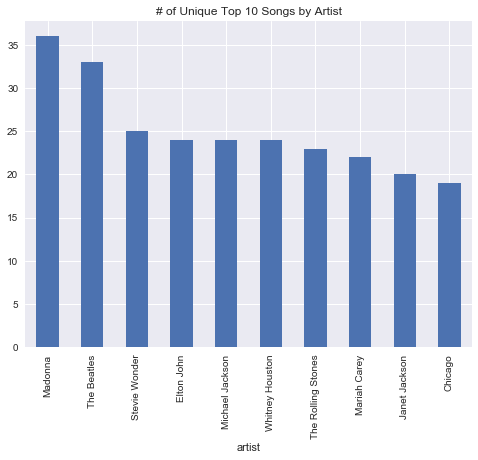

In [4]:
unique_title_artist.groupby('artist').size().sort_values(ascending=False)[:10].plot(
    kind='bar',title='# of Unique Top 10 Songs by Artist')

Madonna has largest number of popular songs in billboard history. The Beatles has more popular songs than Mariah Carey,and we also see other familiar names coming up, such as Stevie Wonder, Elton John,and Machael Jackson

### question2: which song is most liked for the longest time(or it topped 1st place for longest continuous weeks)? and how long is it? Which song is among top 10 for most of the weeks(not continuously)?

In [5]:
# continuous top 1
top1.head(10)
titles = top1.title.values
artists = top1.artist.values
continuous_weeks = []
count = 1

for i in xrange(1,len(titles)):
    if titles[i] == titles[i-1]:
        count += 1
    else:
        continuous_weeks.append((titles[i-1]+u' by '+artists[i-1],count))
        count = 1
continuous_weeks.sort(key=lambda x:-x[1])
pd.DataFrame(continuous_weeks[:10],columns=['title_artist','continuous_weeks'])

,title_artist,continuous_weeks
0,One Sweet Day by Mariah Carey & Boyz II Men,16
1,Uptown Funk! by Mark Ronson Featuring Bruno Mars,14
2,I Gotta Feeling by The Black Eyed Peas,14
3,Candle In The Wind 1997/Something About The Wa...,14
4,Macarena (Bayside Boys Mix) by Los Del Rio,14
5,I ll Make Love To You by Boyz II Men,14
6,"I Will Always Love You (From ""The Bodyguard"") ...",14
7,The Boy Is Mine by Brandy,13
8,"End Of The Road (From ""Boomerang"") by Boyz II Men",13
9,Closer by The Chainsmokers Featuring Halsey,12


Record high goes to 'One Sweet Day' by Mariah Carey & Boyz II Men, people basically can see this song dominating as Top 1 on Billboard chart for four whole months! That's impressive!

How about top 10 songs counting not continuously? Basically just count how many times that song appeared in top 10

In [6]:
top10.groupby(['title','artist']).size().sort_values(ascending=False)[:10].reset_index().rename(
    index=str,columns={'title':'title','artist':'artist',0:'weeks'})

,title,artist,weeks
0,How Do I Live,LeAnn Rimes,32
1,Closer,The Chainsmokers Featuring Halsey,31
2,Uptown Funk!,Mark Ronson Featuring Bruno Mars,31
3,Smooth,Santana Featuring Rob Thomas,30
4,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,29
5,Foolish Games/You Were Meant For Me,Jewel,28
6,Truly Madly Deeply,Savage Garden,26
7,Un-Break My Heart,Toni Braxton,25
8,Apologize,Timbaland Featuring OneRepublic,25
9,The Twist,Chubby Checker,25


In this way we get to know more less famous artists, and we also learn this:

being able to stay the longest weeks as top 1 does not necessarily mean you can also stay the longest in top 10 chart. For example in the above table, we can't find any Mariah Carey song.

### question3: which artist's tracks likes to bomb the chart?(i.e. become top 1 once released)

In [7]:
# define the bomb: rank = 1 and weeks = 1, if on chart for the first week it has ranked top 1 then it's a bomb
top1[top1.change_in_rank==u"Hot Shot Debut"]

,date,title,artist,rank,weeks,change_in_rank,spotifyID
0,2017-01-28,Shape Of You,Ed Sheeran,1.0,1.0,Hot Shot Debut,0FE9t6xYkqWXU2ahLh6D8X
0,2016-05-28,Can't Stop The Feeling!,Justin Timberlake,1.0,1.0,Hot Shot Debut,6JV2JOEocMgcZxYSZelKcc
0,2016-02-20,Pillowtalk,Zayn,1.0,1.0,Hot Shot Debut,0IKK48xF4eEdfofyaeKWWO
0,2015-11-14,Hello,Adele,1.0,1.0,Hot Shot Debut,1MDoll6jK4rrk2BcFRP5i7
0,2015-09-19,What Do You Mean?,Justin Bieber,1.0,1.0,Hot Shot Debut,1ds2QsfhAAfRiaFMGDzrdb
0,2014-09-06,Shake It Off,Taylor Swift,1.0,1.0,Hot Shot Debut,7zCCVZBgy3Ij5fX7S4fs60
0,2013-03-02,Harlem Shake,Baauer,1.0,1.0,Hot Shot Debut,2eP6GhdRE1Ydnw2uXzo7q8
0,2012-03-03,Part Of Me,Katy Perry,1.0,1.0,Hot Shot Debut,1nZzRJbFvCEct3uzu04ZoL
0,2011-02-26,Born This Way,Lady Gaga,1.0,1.0,Hot Shot Debut,0FC7X3BRdEJC8L4ZEUAv2Q
0,2011-01-29,Hold It Against Me,Britney Spears,1.0,1.0,Hot Shot Debut,6CnuehRR8GVXJfzCs25GX9


### It's interesting that all these songs come from 21st century. 
Maybe one of the reasons is that listeners' access to good songs nowadays has increased compared with the situation in the past, where the spreading speed of songs could be much slower than now.


### question4: continued from above analysis on songs' total number of weeks on the billboard chart, how has the total number changed over time? If decreased we could conclude the competition has increased over the years

In [8]:
# for every song in the chart, get the largest weeks number, then analyze their relationship with date
top10['year'] = map(lambda x:x.split('-')[0],top10.date.values)
song_weeks = {}
for i in xrange(len(top10)):
    title_artist,year = top10.title.iloc[i]+u' by '+top10.artist.iloc[i],top10.year.iloc[i]
    if title_artist not in song_weeks:
        song_weeks[title_artist] = (1,year)
    else:
        song_weeks[title_artist] = song_weeks[title_artist][0]+1,song_weeks[title_artist][1]
    
song_weeks = pd.DataFrame(song_weeks.values(),song_weeks.keys(),columns = ['weeks','year'])
song_weeks.head(2)

,weeks,year
Sensitivity by Ralph Tresvant,8,1991
That's All You Gotta Do by Brenda Lee,5,1960


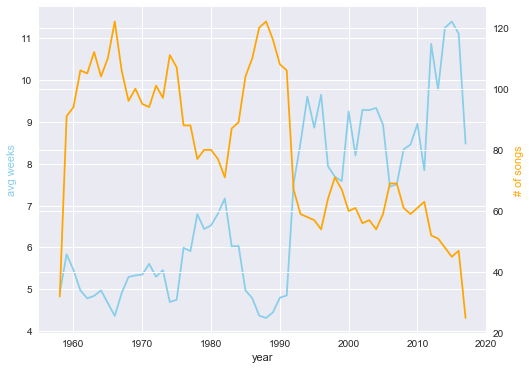

In [9]:
mean_weeks = song_weeks.groupby('year').mean()

total_songs = song_weeks.groupby('year').size()
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(mean_weeks,color='skyblue')
ax2.plot(total_songs,color='orange')
ax1.set_xlabel('year')
ax1.set_ylabel('avg weeks',color='skyblue')
ax2.set_ylabel('# of songs',color='orange')

We can find something interesting here. 

- 1.Total unique songs on the billboard chart is decreasing, which means the competition to get on board is not as intense as in the 1980s or 1960s, or artists are getting good at making growingly addictive songs!

- 2.The competition for billboard got very intense during 1970s and 1990s, with a slight drop during 1980s.As we went into 21st centure, the competition got relaxed by seeing half as many songs competing as in 1990s.

It gets more interesting when we compare above info with the graph telling us which particular song lasts longest time each year

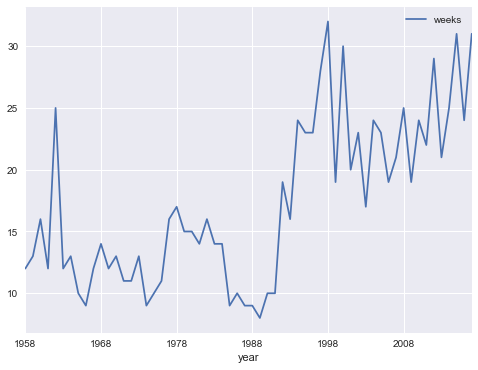

In [10]:
yearly_long_live_songs = song_weeks.sort_values('weeks',ascending=False)
yearly_long_live_songs.drop_duplicates(subset=['year'],keep='first',inplace=True)
yearly_long_live_songs = yearly_long_live_songs.sort_values('year')
# plt.plot(yearly_long_live_songs.year,yearly_long_live_songs.weeks)
yearly_long_live_songs = yearly_long_live_songs.set_index('year')
yearly_long_live_songs.plot(kind='line')

We have seen 1970s and 1990s have most unique songs on billboard history, but this graph tells us that compared with 1970s, 1990s is the both most competitive and of high popularity songs in pop music history, with songs lasting averagely 25 weeks in the mid to late 90s.

### question5: are songs performed by collaborated artists becoming more popular than before?

In [11]:
artists = top10.artist.values
import re
artist_pairs = map(lambda x:re.split(" Featuring | \/ | \& | x | feat. ",x),artists)
top10['n_artists'] = [len(i) for i in artist_pairs]

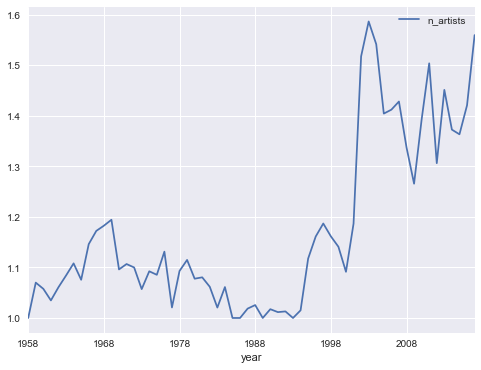

In [12]:
test = top10[['title','n_artists','year']].groupby(['year','title']).mean()
unique_song_table = pd.DataFrame(zip(test.index.get_level_values('year'),test.n_artists),columns = ['year','n_artists'])
unique_song_table.groupby('year').mean().plot(kind='line')

We can see more artists collaboration work on the top 10 charts!

# Conclusion

By answering previous questions we have a general idea as to:
- which song by artist lasted longest weeks as top 1 hit?
- which artist can produce most top 10 songs?
- which top 10 song lasted longest weeks?
- pattern in hot debut songs in recent years
- over time how # of unique songs on billboard chart and average # of weeks they have?
- is collaboration in songs becoming more popular?

We can clearly see that historically, 1990s is a very good time period for music lovers because they have a lot variety of songs to choose to listen to, and some of these songs are extremely popular in the mid to late 90s, songs from 90s are likely to become a classic. That's why I LOVE 90s songs!

Also we can find out that as technology allows more and various access to music, it's easier for modern artists to produce hot debut songs and land as top 1 hit on Billboard once they release them. Also collaboration between artists are increasingly popular as they put more songs onto Billboard than in the 20th century